In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely import wkt

# Mount your Drive (in Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Load your CSV
csv_path = "/content/drive/MyDrive/traffic data/SD_Local_Roads__Speed_and_Volume.csv"
df = pd.read_csv(csv_path)

# Convert WKT geometry string to actual geometry
df['geometry'] = df['geometry'].apply(wkt.loads)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")  # WGS84 for ArcGIS

# Save as GeoJSON (or you can use SHP)
geojson_path = "/content/drive/MyDrive/traffic data/SD_Local_Roads__Speed_and_Volume.geojson"
gdf.to_file(geojson_path, driver='GeoJSON')

print("✅ GeoJSON saved and ready for ArcGIS:", geojson_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ GeoJSON saved and ready for ArcGIS: /content/drive/MyDrive/traffic data/SD_Local_Roads__Speed_and_Volume.geojson


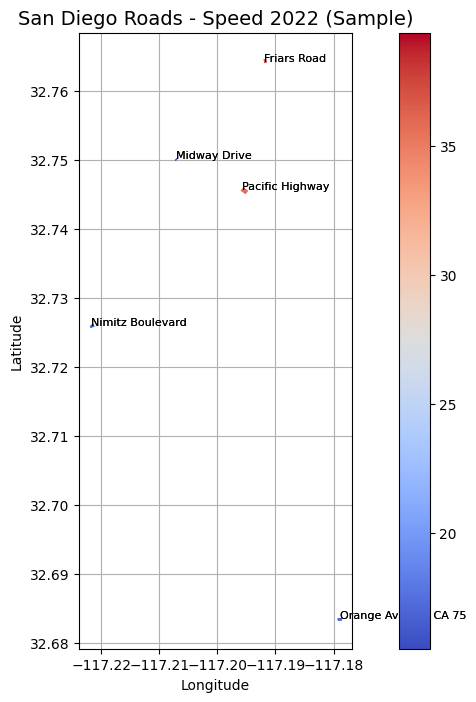

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt

# Load your data
csv_path = "/content/drive/MyDrive/traffic data/SD_Local_Roads__Speed_and_Volume.csv"
df = pd.read_csv(csv_path)

# Convert WKT 'geometry' column to shapely LineStrings
df['geometry'] = df['geometry'].apply(wkt.loads)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

# Sample 10 features to keep the map clear
sample = gdf.head(10)

# Plot, coloring by Speed 2022 MPH
fig, ax = plt.subplots(figsize=(12, 8))
sample.plot(ax=ax, column='Speed 2022 MPH', cmap='coolwarm', legend=True, linewidth=3)

# Annotate street names
for idx, row in sample.iterrows():
    x, y = row.geometry.coords[0]
    ax.text(x, y, str(row['Street Name']), fontsize=8, color='black')

# Map decorations
ax.set_title("San Diego Roads - Speed 2022 (Sample)", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


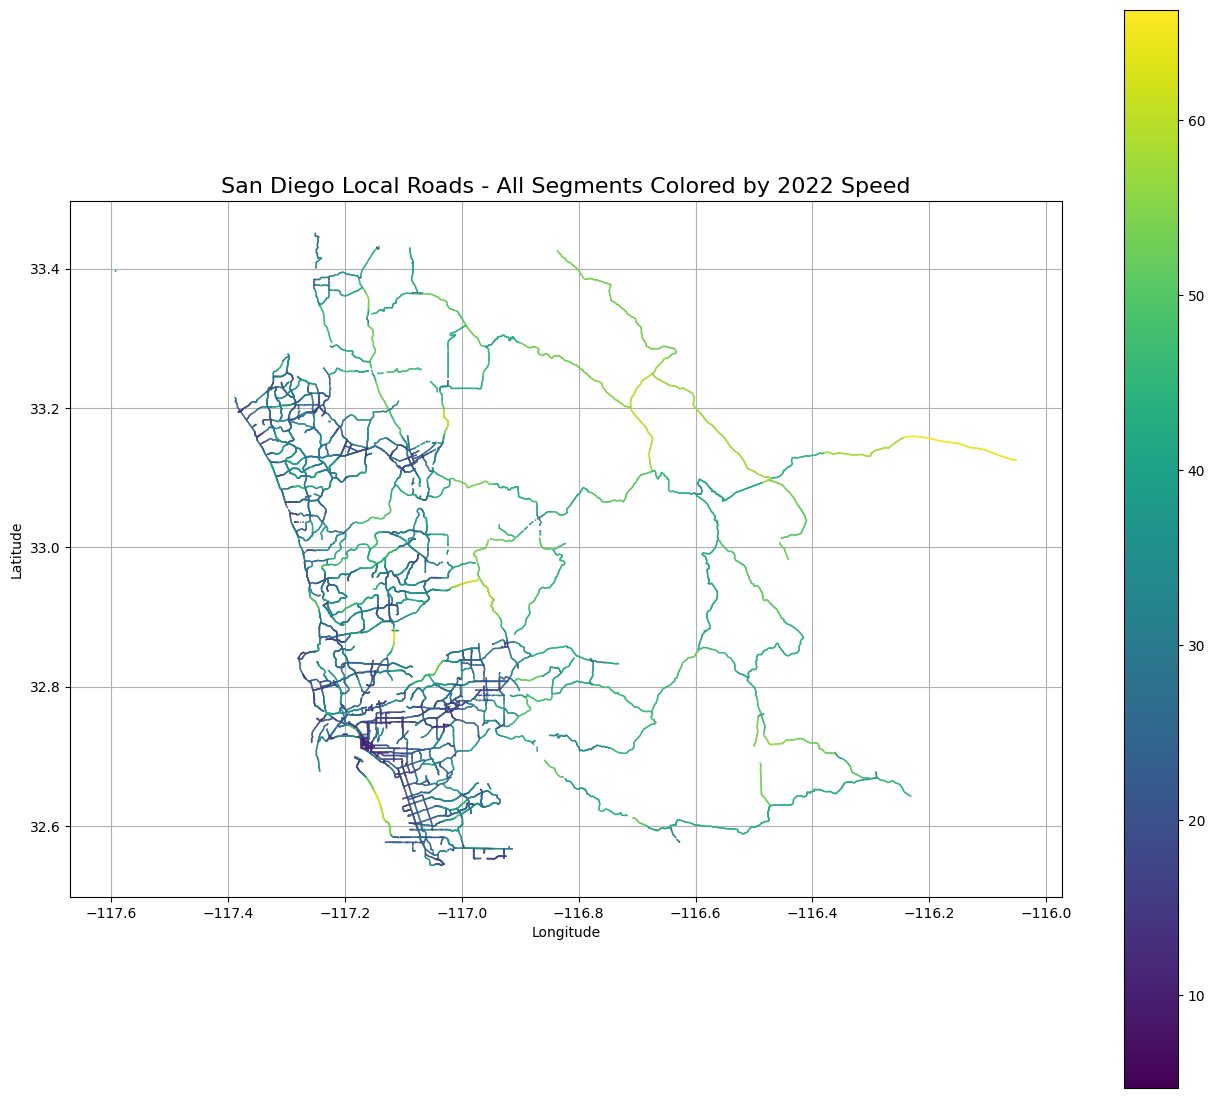

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt

# Load your full dataset
csv_path = "/content/drive/MyDrive/traffic data/SD_Local_Roads__Speed_and_Volume.csv"
df = pd.read_csv(csv_path)

# Convert the WKT 'geometry' string to shapely geometry
df['geometry'] = df['geometry'].apply(wkt.loads)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

# Plot ALL geometries, color by speed if available
fig, ax = plt.subplots(figsize=(16, 14))

# Optional: filter out null speed values if needed
gdf = gdf[gdf['Speed 2022 MPH'].notna()]

# Plot the full GeoDataFrame, color by speed
gdf.plot(ax=ax, column='Speed 2022 MPH', cmap='viridis', legend=True, linewidth=1)

# Beautify the plot
ax.set_title("San Diego Local Roads - All Segments Colored by 2022 Speed", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

csv_path = "/content/drive/MyDrive/traffic data/traffic volume/accidents_with_traffic_volume_2013_to_2024.csv"
df = pd.read_csv(csv_path)

print(df.columns.tolist())


['Long', 'Lat', 'Join_Count', 'TARGET_FID', 'JOIN_FID', 'CASE_ID', 'ACCIDENT_YEAR', 'COLLISION_DATE', 'COLLISION_TIME', 'DAY_OF_WEEK', 'CHP_SHIFT', 'POPULATION', 'CNTY_CITY_LOC', 'SPECIAL_COND', 'BEAT_TYPE', 'CHP_BEAT_TYPE', 'CITY_DIVISION_LAPD', 'CHP_BEAT_CLASS', 'BEAT_NUMBER', 'PRIMARY_RD', 'SECONDARY_RD', 'DISTANCE', 'DIRECTION', 'INTERSECTION', 'WEATHER_1', 'WEATHER_2', 'STATE_HWY_IND', 'CALTRANS_COUNTY', 'CALTRANS_DISTRICT', 'STATE_ROUTE', 'ROUTE_SUFFIX', 'POSTMILE_PREFIX', 'POSTMILE', 'LOCATION_TYPE', 'RAMP_INTERSECTION', 'SIDE_OF_HWY', 'TOW_AWAY', 'COLLISION_SEVERITY', 'NUMBER_KILLED', 'NUMBER_INJURED', 'PARTY_COUNT', 'PRIMARY_COLL_FACTOR', 'PCF_CODE_OF_VIOL', 'PCF_VIOL_CATEGORY', 'PCF_VIOLATION', 'PCF_VIOL_SUBSECTION', 'HIT_AND_RUN', 'TYPE_OF_COLLISION', 'MVIW', 'PED_ACTION', 'ROAD_SURFACE', 'ROAD_COND_1', 'ROAD_COND_2', 'LIGHTING', 'CONTROL_DEVICE', 'CHP_ROAD_TYPE', 'PEDESTRIAN_ACCIDENT', 'BICYCLE_ACCIDENT', 'MOTORCYCLE_ACCIDENT', 'TRUCK_ACCIDENT', 'NOT_PRIVATE_PROPERTY', 'ALC

<ipython-input-13-4ef95d2ab2b9>:4: DtypeWarning: Columns (15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


In [2]:
import pandas as pd

csv_path = "/content/drive/MyDrive/traffic data/traffic volume/accidents_with_traffic_volume_2013_to_2024.csv"
df = pd.read_csv(csv_path)

case_id_counts = df['CASE_ID'].value_counts()
count_1 = (case_id_counts == 1).sum()
count_2 = (case_id_counts == 2).sum()
count_3_plus = (case_id_counts == 6).sum()

print({
    "CASE_ID appears once": count_1,
    "CASE_ID appears twice": count_2,
    "CASE_ID appears 3 or more times": count_3_plus
})


{'CASE_ID appears once': np.int64(42), 'CASE_ID appears twice': np.int64(1578), 'CASE_ID appears 3 or more times': np.int64(780)}


<ipython-input-2-097f80ddf4da>:4: DtypeWarning: Columns (15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


In [ ]:
import pandas as pd

# Path to your dataset (update if needed)
csv_path = "/content/drive/MyDrive/traffic data/traffic volume/accidents_with_traffic_volume_2013_to_2024.csv"

# Load only the relevant columns for performance
columns = [
    'CASE_ID', 'COLLISION_DATE', 'COLLISION_TIME', 'PRIMARY_RD', 'SECONDARY_RD', 'DIRECTION',
    'osm_id', 'Street_Name', 'Highway', 'Lanes', 'Speed_Limit_MPH', 'Length',
    'Direction_1', 'PeakPeriod', 'Speed_2022_MPH', 'Speed_2021_MPH',
    'F1_year_Speed___change', 'F2022_AADT_Range', 'F2021_AADT_Range', 'F1_year_AADT___change'
]

# Load data with selected columns
df = pd.read_csv(csv_path, usecols=columns)

# Show number of unique CASE_IDs
unique_case_ids = df['CASE_ID'].nunique()

# Display result
print(f"✅ Number of unique CASE_ID values: {unique_case_ids}")
df.head()


✅ Number of unique CASE_ID values: 6984


,CASE_ID,COLLISION_DATE,COLLISION_TIME,PRIMARY_RD,SECONDARY_RD,DIRECTION,osm_id,Street_Name,Highway,Lanes,Speed_Limit_MPH,Length,Direction_1,PeakPeriod,Speed_2022_MPH,Speed_2021_MPH,F1_year_Speed___change,F2022_AADT_Range,F2021_AADT_Range,F1_year_AADT___change
0,6090943,2013-05-30,1632,PARK BL,MARKET ST,NaN,436305551,Market Street,secondary,2,37,37.650002,E,AM,13.6,12.8,5.8,"10,000-19,999","10,000-19,999",13.5
1,6090943,2013-05-30,1632,PARK BL,MARKET ST,NaN,436305551,Market Street,secondary,2,37,37.650002,E,PM,13.9,12.7,8.8,"10,000-19,999","10,000-19,999",13.5
2,6093441,2013-05-30,2036,8TH ST,ORANGE AV,W,436413494,"Orange Avenue, CA 75",primary,3,40,63.740002,SW,AM,16.9,17.9,-5.6,"10,000-19,999","10,000-19,999",13.0
3,6093441,2013-05-30,2036,8TH ST,ORANGE AV,W,436413494,"Orange Avenue, CA 75",primary,3,40,63.740002,SW,PM,15.5,15.6,-1.1,"10,000-19,999","10,000-19,999",13.0
4,6093441,2013-05-30,2036,8TH ST,ORANGE AV,W,436413519,"Orange Avenue, CA 75",primary,2,40,177.979996,SW,AM,16.9,17.9,-5.6,"10,000-19,999","10,000-19,999",12.0


In [ ]:
import pandas as pd

# Load data
csv_path = "/content/drive/MyDrive/traffic data/traffic volume/accidents_with_traffic_volume_2013_to_2024.csv"
df = pd.read_csv(csv_path)

# Normalize data for matching
df['PRIMARY_RD'] = df['PRIMARY_RD'].astype(str).str.lower()
df['Street_Name'] = df['Street_Name'].astype(str).str.lower()
df['DIRECTION'] = df['DIRECTION'].astype(str).str.strip().str.upper()
df['Direction_1'] = df['Direction_1'].astype(str).str.strip().str.upper()

# Function to assign one osm_id per CASE_ID
def select_osm_for_case(group):
    # Step 1: Attempt match on road and direction (both case-insensitive)
    matches = group[
        group['Street_Name'].str.contains(group['PRIMARY_RD'].iloc[0], na=False) &
        (group['DIRECTION'] == group['Direction_1'])
    ]

    # Step 2: If matches found
    if not matches.empty:
        unique_osm_ids = matches['osm_id'].dropna().unique()
        chosen_osm_id = (
            unique_osm_ids[0] if len(unique_osm_ids) == 1
            else pd.Series(unique_osm_ids).sample(1, random_state=42).iloc[0]
        )
    else:
        # Step 3: No match — randomly choose one available osm_id from group
        chosen_osm_id = group['osm_id'].dropna().sample(1, random_state=42).iloc[0]

    # Keep all rows in group with the chosen osm_id
    return group[group['osm_id'] == chosen_osm_id]

# Apply to each CASE_ID group
result_df = df.groupby("CASE_ID", group_keys=False).apply(select_osm_for_case).reset_index(drop=True)

# Summary
print(f"✅ Final row count: {result_df.shape[0]}")
print(f"🎯 Unique CASE_IDs retained: {result_df['CASE_ID'].nunique()}")
print(f"🔗 Unique osm_ids used: {result_df['osm_id'].nunique()}")

# Optional preview
result_df.head()




<ipython-input-21-7e56533db522>:5: DtypeWarning: Columns (15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)
<ipython-input-21-7e56533db522>:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  group['Street_Name'].str.contains(group['PRIMARY_RD'].iloc[0], na=False) &


✅ Final row count: 16032
🎯 Unique CASE_IDs retained: 6984
🔗 Unique osm_ids used: 3619


<ipython-input-21-7e56533db522>:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = df.groupby("CASE_ID", group_keys=False).apply(select_osm_for_case).reset_index(drop=True)


,Long,Lat,Join_Count,TARGET_FID,JOIN_FID,CASE_ID,ACCIDENT_YEAR,COLLISION_DATE,COLLISION_TIME,DAY_OF_WEEK,...,Speed_Limit_MPH,Length,Direction_1,PeakPeriod,Speed_2022_MPH,Speed_2021_MPH,F1_year_Speed___change,F2022_AADT_Range,F2021_AADT_Range,F1_year_AADT___change
0,-117.093777,32.694394,1,201,12767,5639604,2013,2013-02-01,1816,5,...,37,108.570000,S,AM,21.299999,21.900000,-2.7,"5,000-9,999","10,000-19,999",-22.299999
1,-117.093777,32.694394,1,201,12768,5639604,2013,2013-02-01,1816,5,...,37,108.570000,S,PM,22.299999,21.299999,4.7,"5,000-9,999","10,000-19,999",-22.299999
2,-117.122654,32.917255,1,204,36494,5639817,2013,2013-02-18,1937,1,...,40,113.190002,W,AM,26.700001,26.700001,-0.1,"20,000-39,999","20,000-39,999",-5.900000
3,-117.122654,32.917255,1,204,36498,5639817,2013,2013-02-18,1937,1,...,40,113.190002,W,PM,19.100000,20.000000,-4.8,"20,000-39,999","20,000-39,999",-5.900000
4,-117.159290,32.990074,1,205,7587,5639818,2013,2013-02-01,1143,5,...,37,335.899994,NE,AM,40.700001,43.099998,-5.7,"5,000-9,999","5,000-9,999",-17.700001


In [3]:
import pandas as pd
import re

# Load data
csv_path = "/content/drive/MyDrive/traffic data/traffic volume/accidents_with_traffic_volume_2013_to_2024.csv"
df = pd.read_csv(csv_path)

# Normalize data for matching
df['PRIMARY_RD'] = df['PRIMARY_RD'].astype(str).str.lower().str.strip()
df['SECONDARY_RD'] = df['SECONDARY_RD'].astype(str).str.lower().str.strip()
df['Street_Name'] = df['Street_Name'].astype(str).str.lower().str.strip()
df['DIRECTION'] = df['DIRECTION'].astype(str).str.strip().str.upper()
df['Direction_1'] = df['Direction_1'].astype(str).str.strip().str.upper()

# Function to assign one osm_id per CASE_ID
def select_osm_for_case(group):
    primary = group['PRIMARY_RD'].iloc[0]
    secondary = group['SECONDARY_RD'].iloc[0]
    direction = group['DIRECTION'].iloc[0]

    def match_with_direction(df):
        dir_matches = df[df['DIRECTION'] == df['Direction_1']]
        if not dir_matches.empty:
            return dir_matches
        return df.sample(1, random_state=42) if not df.empty else pd.DataFrame()

    # Step 1: Exact match on PRIMARY_RD
    match1 = group[group['Street_Name'] == primary]
    result = match_with_direction(match1)
    if not result.empty:
        return result

    # Step 2: Match on first word of PRIMARY_RD == Street_Name
    primary_first_word = re.split(r'\s|\d', primary)[0].strip()
    match2 = group[group['Street_Name'] == primary_first_word]
    result = match_with_direction(match2)
    if not result.empty:
        return result

    # Step 3: Exact match on SECONDARY_RD
    if pd.notna(secondary):
        match3 = group[group['Street_Name'] == secondary]
        result = match_with_direction(match3)
        if not result.empty:
            return result

    # Step 4: Match only on DIRECTION
    match4 = group[group['DIRECTION'] == group['Direction_1']]
    if not match4.empty:
        return match4.sample(1, random_state=42)

    # Step 5: Final fallback - randomly pick one
    return group.sample(1, random_state=42)

# Apply the function per CASE_ID
result_df = df.groupby("CASE_ID", group_keys=False).apply(select_osm_for_case).reset_index(drop=True)

# Summary
print(f"✅ Final row count: {result_df.shape[0]}")
print(f"🎯 Unique CASE_IDs retained: {result_df['CASE_ID'].nunique()}")
print(f"🔗 Unique osm_ids used: {result_df['osm_id'].nunique()}")

# Optional preview
result_df.head()


<ipython-input-3-4a45bbe81da4>:6: DtypeWarning: Columns (15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


✅ Final row count: 7091
🎯 Unique CASE_IDs retained: 6984
🔗 Unique osm_ids used: 3588


<ipython-input-3-4a45bbe81da4>:56: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = df.groupby("CASE_ID", group_keys=False).apply(select_osm_for_case).reset_index(drop=True)


,Long,Lat,Join_Count,TARGET_FID,JOIN_FID,CASE_ID,ACCIDENT_YEAR,COLLISION_DATE,COLLISION_TIME,DAY_OF_WEEK,...,Speed_Limit_MPH,Length,Direction_1,PeakPeriod,Speed_2022_MPH,Speed_2021_MPH,F1_year_Speed___change,F2022_AADT_Range,F2021_AADT_Range,F1_year_AADT___change
0,-117.093777,32.694394,1,201,12768,5639604,2013,2013-02-01,1816,5,...,37,108.570000,S,PM,22.299999,21.299999,4.7,"5,000-9,999","10,000-19,999",-22.299999
1,-117.122654,32.917255,1,204,36498,5639817,2013,2013-02-18,1937,1,...,40,113.190002,W,PM,19.100000,20.000000,-4.8,"20,000-39,999","20,000-39,999",-5.900000
2,-117.159290,32.990074,1,205,7588,5639818,2013,2013-02-01,1143,5,...,37,335.899994,NE,PM,40.599998,41.900002,-3.0,"5,000-9,999","5,000-9,999",-17.700001
3,-117.201052,32.808549,1,207,1644,5639879,2013,2013-02-04,1826,1,...,37,171.830002,S,PM,25.700001,27.500000,-6.6,"5,000-9,999","5,000-9,999",-13.400000
4,-117.219402,32.807495,1,208,7973,5639925,2013,2013-02-16,2221,6,...,40,17.580000,N,PM,15.200000,17.100000,-11.4,"20,000-39,999","20,000-39,999",-4.100000


In [16]:
import pandas as pd
import re

# Load data
csv_path = "/content/drive/MyDrive/traffic data/traffic volume/accidents_with_traffic_volume_2013_to_2024.csv"
df = pd.read_csv(csv_path)

# Normalize data for matching
df['PRIMARY_RD'] = df['PRIMARY_RD'].astype(str).str.lower().str.strip()
df['SECONDARY_RD'] = df['SECONDARY_RD'].astype(str).str.lower().str.strip()
df['Street_Name'] = df['Street_Name'].astype(str).str.lower().str.strip()
df['DIRECTION'] = df['DIRECTION'].astype(str).str.strip().str.upper()
df['Direction_1'] = df['Direction_1'].astype(str).str.strip().str.upper()



def select_osm_for_case(group):
    primary = group['PRIMARY_RD'].iloc[0]
    secondary = group['SECONDARY_RD'].iloc[0]
    direction = group['Direction_1'].iloc[0]

    def try_match(filter_df, step_name):
        dir_match = filter_df[filter_df['DIRECTION'] == direction]
        chosen_df = dir_match if not dir_match.empty else filter_df
        if not chosen_df.empty:
            chosen_osm = chosen_df['osm_id'].dropna().sample(1, random_state=42).iloc[0]
            result = group[group['osm_id'] == chosen_osm].copy()
            result['match_step'] = step_name
            return result
        return pd.DataFrame()

    # Step 1: Match Street_Name == PRIMARY_RD
    result = try_match(group[group['Street_Name'] == primary], 'primary')
    if not result.empty:
        return result

    # Step 2: Match Street_Name == first word of PRIMARY_RD
    first_word = re.split(r'\s|\d', primary)[0].strip()
    result = try_match(group[group['Street_Name'] == first_word], 'primary_first_word')
    if not result.empty:
        return result

    # Step 3: Match Street_Name == SECONDARY_RD
    result = try_match(group[group['Street_Name'] == secondary], 'secondary')
    if not result.empty:
        return result

    # Step 4: Match only on DIRECTION
    result = group[group['DIRECTION'] == direction]
    if not result.empty:
        chosen_osm = result['osm_id'].dropna().sample(1, random_state=42).iloc[0]
        result = group[group['osm_id'] == chosen_osm].copy()
        result['match_step'] = 'direction_only'
        return result

    # Step 5: Final fallback – random pick
    chosen_osm = group['osm_id'].dropna().sample(1, random_state=42).iloc[0]
    result = group[group['osm_id'] == chosen_osm].copy()
    result['match_step'] = 'random'
    return result

# Apply to each CASE_ID group
result_df = df.groupby("CASE_ID", group_keys=False).apply(select_osm_for_case).reset_index(drop=True)

# Summary
print(f"✅ Final row count: {result_df.shape[0]}")
print(f"🎯 Unique CASE_IDs retained: {result_df['CASE_ID'].nunique()}")
print(f"🔗 Unique osm_ids used: {result_df['osm_id'].nunique()}")

# Preview
result_df.head()


<ipython-input-16-4af8d839e162>:6: DtypeWarning: Columns (15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


✅ Final row count: 16053
🎯 Unique CASE_IDs retained: 6984
🔗 Unique osm_ids used: 3525


<ipython-input-16-4af8d839e162>:63: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = df.groupby("CASE_ID", group_keys=False).apply(select_osm_for_case).reset_index(drop=True)


,Long,Lat,Join_Count,TARGET_FID,JOIN_FID,CASE_ID,ACCIDENT_YEAR,COLLISION_DATE,COLLISION_TIME,DAY_OF_WEEK,...,Length,Direction_1,PeakPeriod,Speed_2022_MPH,Speed_2021_MPH,F1_year_Speed___change,F2022_AADT_Range,F2021_AADT_Range,F1_year_AADT___change,match_step
0,-117.093777,32.694394,1,201,12767,5639604,2013,2013-02-01,1816,5,...,108.570000,S,AM,21.299999,21.900000,-2.7,"5,000-9,999","10,000-19,999",-22.299999,random
1,-117.093777,32.694394,1,201,12768,5639604,2013,2013-02-01,1816,5,...,108.570000,S,PM,22.299999,21.299999,4.7,"5,000-9,999","10,000-19,999",-22.299999,random
2,-117.122654,32.917255,1,204,36494,5639817,2013,2013-02-18,1937,1,...,113.190002,W,AM,26.700001,26.700001,-0.1,"20,000-39,999","20,000-39,999",-5.900000,direction_only
3,-117.122654,32.917255,1,204,36498,5639817,2013,2013-02-18,1937,1,...,113.190002,W,PM,19.100000,20.000000,-4.8,"20,000-39,999","20,000-39,999",-5.900000,direction_only
4,-117.159290,32.990074,1,205,7587,5639818,2013,2013-02-01,1143,5,...,335.899994,NE,AM,40.700001,43.099998,-5.7,"5,000-9,999","5,000-9,999",-17.700001,primary


In [21]:
import pandas as pd
import re

# Load data
csv_path = "/content/drive/MyDrive/traffic data/traffic volume/accidents_with_traffic_volume_2013_to_2024.csv"
df = pd.read_csv(csv_path)

# Normalize data for matching
df['PRIMARY_RD'] = df['PRIMARY_RD'].astype(str).str.lower().str.strip()
df['SECONDARY_RD'] = df['SECONDARY_RD'].astype(str).str.lower().str.strip()
df['Street_Name'] = df['Street_Name'].astype(str).str.lower().str.strip()
df['DIRECTION'] = df['DIRECTION'].astype(str).str.strip().str.upper()
df['Direction_1'] = df['Direction_1'].astype(str).str.strip().str.upper()

# Matching function
def select_osm_for_case(group):
    primary = group['PRIMARY_RD'].iloc[0]
    secondary = group['SECONDARY_RD'].iloc[0]
    direction = group['Direction_1'].iloc[0]

    def try_match(filter_df, step_name):
        dir_match = filter_df[filter_df['DIRECTION'] == direction]
        chosen_df = dir_match if not dir_match.empty else filter_df
        if not chosen_df.empty:
            chosen_osm = chosen_df['osm_id'].dropna().sample(1, random_state=42).iloc[0]
            result = group[group['osm_id'] == chosen_osm].copy()
            result['match_step'] = step_name
            return result
        return pd.DataFrame()

    # Step 1: Exact match on PRIMARY_RD
    result = try_match(group[group['Street_Name'] == primary], 'primary')
    if not result.empty:
        return result

    # Step 2: Match if Street_Name starts with first word of PRIMARY_RD
    first_word = re.split(r'\s|\d', primary)[0].strip()
    match2 = group[group['Street_Name'].str.startswith(first_word)]
    result = try_match(match2, 'primary_first_word')
    if not result.empty:
        return result

    # Step 3: Match if Street_Name starts with first word of SECONDARY_RD
    if pd.notna(secondary):
        secondary_first = re.split(r'\s|\d', secondary)[0].strip()
        match3 = group[group['Street_Name'].str.startswith(secondary_first)]
        result = try_match(match3, 'secondary')
        if not result.empty:
            return result

    # Step 4: Match only on DIRECTION
    match4 = group[group['DIRECTION'] == direction]
    if not match4.empty:
        chosen_osm = match4['osm_id'].dropna().sample(1, random_state=42).iloc[0]
        result = group[group['osm_id'] == chosen_osm].copy()
        result['match_step'] = 'direction_only'
        return result

    # Step 5: Final fallback – random selection
    chosen_osm = group['osm_id'].dropna().sample(1, random_state=42).iloc[0]
    result = group[group['osm_id'] == chosen_osm].copy()
    result['match_step'] = 'random'
    return result

# Apply function
result_df = df.groupby("CASE_ID", group_keys=False).apply(select_osm_for_case).reset_index(drop=True)

# Summary
print(f"✅ Final row count: {result_df.shape[0]}")
print(f"🎯 Unique CASE_IDs retained: {result_df['CASE_ID'].nunique()}")
print(f"🔗 Unique osm_ids used: {result_df['osm_id'].nunique()}")

# Optional: Match summary
match_summary = result_df[['CASE_ID', 'match_step']].drop_duplicates()['match_step'].value_counts()
print("\n📊 Match Step Summary:")
print(match_summary)


<ipython-input-21-cda9107baa3c>:6: DtypeWarning: Columns (15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


✅ Final row count: 16075
🎯 Unique CASE_IDs retained: 6984
🔗 Unique osm_ids used: 3603

📊 Match Step Summary:
match_step
primary_first_word    5173
secondary              858
random                 627
primary                264
direction_only          62
Name: count, dtype: int64


<ipython-input-21-cda9107baa3c>:66: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = df.groupby("CASE_ID", group_keys=False).apply(select_osm_for_case).reset_index(drop=True)


In [ ]:
# Reload original file to compare
df_original = pd.read_csv('/content/drive/MyDrive/traffic data/social status merge/aggreated_collision_with_all_social.csv')

# Find where avg_x or avg_y was missing originally
missing_coords = df_original['avg_x'].isna() | df_original['avg_y'].isna()

# Show only those rows from the updated DataFrame
filled_centroids = df_merged[missing_coords]

# Display the filled rows
print("🧭 Rows where coordinates were filled using tract centroids:")
print(filled_centroids[['CASE_ID', 'GEOID', 'avg_x', 'avg_y']].head(20))  # Show top 20


In [24]:
# Randomly select one row per CASE_ID
one_row_per_case = result_df.groupby("CASE_ID", group_keys=False).sample(n=1, random_state=42)

# Preview
print(f"✅ Total unique CASE_IDs: {one_row_per_case['CASE_ID'].nunique()}")
one_row_per_case.head()

output_path = "/content/drive/MyDrive/traffic data/traffic volume/one_row_per_case.csv"
one_row_per_case.to_csv(output_path, index=False)
print(f"📁 One-row-per-CASE_ID CSV saved to: {output_path}")


✅ Total unique CASE_IDs: 6984
📁 One-row-per-CASE_ID CSV saved to: /content/drive/MyDrive/traffic data/traffic volume/one_row_per_case.csv


In [23]:
# Count unique osm_id values per CASE_ID
osm_counts = result_df.groupby('CASE_ID')['osm_id'].nunique()

# Count how many CASE_IDs have exactly one unique osm_id
one_osm_cases = (osm_counts == 1).sum()

# Total CASE_IDs
total_cases = result_df['CASE_ID'].nunique()

print(f"🔍 CASE_IDs with exactly one osm_id: {one_osm_cases} out of {total_cases}")


🔍 CASE_IDs with exactly one osm_id: 6984 out of 6984


In [18]:
# Count distinct CASE_IDs for each group
n_primary = result_df[result_df['match_step'].isin(['primary', 'primary_first_word'])]['CASE_ID'].nunique()
n_secondary = result_df[result_df['match_step'] == 'secondary']['CASE_ID'].nunique()
n_random = result_df[result_df['match_step'] == 'random']['CASE_ID'].nunique()

# Print summary
print("\n📊 Match Type Summary:")
print(f"✅ Matched by primary or first word: {n_primary}")
print(f"📍 Matched by secondary street: {n_secondary}")
print(f"🎲 Totally random selection: {n_random}")



📊 Match Type Summary:
✅ Matched by primary or first word: 275
📍 Matched by secondary street: 102
🎲 Totally random selection: 5742


In [19]:
random_matches = result_df[result_df['match_step'] == 'random']
random_case_ids = random_matches['CASE_ID'].drop_duplicates().head(20)

# Show the full rows for these 20 CASE_IDs
result_df[result_df['CASE_ID'].isin(random_case_ids)]


,Long,Lat,Join_Count,TARGET_FID,JOIN_FID,CASE_ID,ACCIDENT_YEAR,COLLISION_DATE,COLLISION_TIME,DAY_OF_WEEK,...,Length,Direction_1,PeakPeriod,Speed_2022_MPH,Speed_2021_MPH,F1_year_Speed___change,F2022_AADT_Range,F2021_AADT_Range,F1_year_AADT___change,match_step
0,-117.093777,32.694394,1,201,12767,5639604,2013,2013-02-01,1816,5,...,108.570000,S,AM,21.299999,21.900000,-2.7,"5,000-9,999","10,000-19,999",-22.299999,random
1,-117.093777,32.694394,1,201,12768,5639604,2013,2013-02-01,1816,5,...,108.570000,S,PM,22.299999,21.299999,4.7,"5,000-9,999","10,000-19,999",-22.299999,random
8,-117.219402,32.807495,1,208,7972,5639925,2013,2013-02-16,2221,6,...,17.580000,N,AM,19.400000,20.700001,-6.2,"20,000-39,999","20,000-39,999",-4.100000,random
9,-117.219402,32.807495,1,208,7973,5639925,2013,2013-02-16,2221,6,...,17.580000,N,PM,15.200000,17.100000,-11.4,"20,000-39,999","20,000-39,999",-4.100000,random
10,-117.007072,33.338171,1,209,66175,5639956,2013,2013-01-20,1908,7,...,132.460007,NW,AM,48.500000,45.900002,5.5,"5,000-9,999",NaN,NaN,random
11,-117.007072,33.338171,1,209,66177,5639956,2013,2013-01-20,1908,7,...,132.460007,NW,PM,48.000000,45.500000,5.5,"5,000-9,999",NaN,NaN,random
12,-116.876749,32.717138,1,211,29621,5890297,2013,2013-01-02,2120,3,...,31.230000,SE,AM,42.000000,NaN,NaN,"10,000-19,999",NaN,NaN,random
13,-116.876749,32.717138,1,211,29623,5890297,2013,2013-01-02,2120,3,...,31.230000,SE,PM,39.500000,NaN,NaN,"10,000-19,999",NaN,NaN,random
14,-116.876749,32.717138,1,211,36122,5890297,2013,2013-01-02,2120,3,...,44.810001,SE,AM,42.000000,NaN,NaN,"10,000-19,999",NaN,NaN,random
15,-116.876749,32.717138,1,211,36124,5890297,2013,2013-01-02,2120,3,...,44.810001,SE,PM,39.500000,NaN,NaN,"10,000-19,999",NaN,NaN,random


In [20]:

random_matches = result_df[result_df['match_step'] == 'random']
random_case_ids = random_matches['CASE_ID'].drop_duplicates().head(20)

# Show only selected columns
cols_to_show = ['CASE_ID', 'PRIMARY_RD', 'SECONDARY_RD', 'Street_Name']
result_df[result_df['CASE_ID'].isin(random_case_ids)][cols_to_show]


,CASE_ID,PRIMARY_RD,SECONDARY_RD,Street_Name
0,5639604,south 47th st,solola av,south 47th street
1,5639604,south 47th st,solola av,south 47th street
8,5639925,mission bay dr,damon av,mission bay drive
9,5639925,mission bay dr,damon av,mission bay drive
10,5639956,rt 76,pauma reservation rd,"pala road, ca 76"
11,5639956,rt 76,pauma reservation rd,"pala road, ca 76"
12,5890297,rt 94,proctor valley rd,"state route 94, ca 94"
13,5890297,rt 94,proctor valley rd,"state route 94, ca 94"
14,5890297,rt 94,proctor valley rd,"state route 94, ca 94"
15,5890297,rt 94,proctor valley rd,"state route 94, ca 94"


In [7]:
import pandas as pd
import re

# Load data
csv_path = "/content/drive/MyDrive/traffic data/traffic volume/accidents_with_traffic_volume_2013_to_2024.csv"
df = pd.read_csv(csv_path)

# Normalize columns for matching
df['PRIMARY_RD'] = df['PRIMARY_RD'].astype(str).str.lower().str.strip()
df['SECONDARY_RD'] = df['SECONDARY_RD'].astype(str).str.lower().str.strip()
df['Street_Name'] = df['Street_Name'].astype(str).str.lower().str.strip()
df['DIRECTION'] = df['DIRECTION'].astype(str).str.strip().str.upper()
df['Direction_1'] = df['Direction_1'].astype(str).str.strip().str.upper()

# Function to assign one osm_id per CASE_ID group, keeping all matching rows
def select_osm_for_case(group):
    primary = group['PRIMARY_RD'].iloc[0]
    secondary = group['SECONDARY_RD'].iloc[0]
    direction = group['DIRECTION'].iloc[0]

    def get_all_rows_for_osm(matches):
        if not matches.empty:
            selected_osm = matches['osm_id'].iloc[0]
            return group[group['osm_id'] == selected_osm]
        return pd.DataFrame()

    def match_with_direction(df):
        dir_matches = df[df['DIRECTION'] == df['Direction_1']]
        if not dir_matches.empty:
            return get_all_rows_for_osm(dir_matches)
        return get_all_rows_for_osm(df.sample(1, random_state=42)) if not df.empty else pd.DataFrame()

    # Step 1: Exact match on PRIMARY_RD
    match1 = group[group['Street_Name'] == primary]
    result = match_with_direction(match1)
    if not result.empty:
        return result

    # Step 2: Match on first word of PRIMARY_RD
    primary_first_word = re.split(r'\s|\d', primary)[0].strip()
    match2 = group[group['Street_Name'] == primary_first_word]
    result = match_with_direction(match2)
    if not result.empty:
        return result

    # Step 3: Exact match on SECONDARY_RD
    if pd.notna(secondary):
        match3 = group[group['Street_Name'] == secondary]
        result = match_with_direction(match3)
        if not result.empty:
            return result

    # Step 4: Match only on DIRECTION
    match4 = group[group['DIRECTION'] == group['Direction_1']]
    if not match4.empty:
        selected_osm = match4.sample(1, random_state=42)['osm_id'].iloc[0]
        return group[group['osm_id'] == selected_osm]

    # Step 5: Final fallback — random selection of one osm_id, return all its rows
    selected_osm = group['osm_id'].dropna().sample(1, random_state=42).iloc[0]
    return group[group['osm_id'] == selected_osm]

# Apply the function to each CASE_ID group
result_df = df.groupby("CASE_ID", group_keys=False).apply(select_osm_for_case).reset_index(drop=True)

# Summary
print(f"✅ Final row count: {result_df.shape[0]}")
print(f"🎯 Unique CASE_IDs retained: {result_df['CASE_ID'].nunique()}")
print(f"🔗 Unique osm_ids used: {result_df['osm_id'].nunique()}")

# Optional preview
result_df.head()


<ipython-input-7-e204db21501a>:6: DtypeWarning: Columns (15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


✅ Final row count: 16039
🎯 Unique CASE_IDs retained: 6984
🔗 Unique osm_ids used: 3576


<ipython-input-7-e204db21501a>:64: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = df.groupby("CASE_ID", group_keys=False).apply(select_osm_for_case).reset_index(drop=True)


,Long,Lat,Join_Count,TARGET_FID,JOIN_FID,CASE_ID,ACCIDENT_YEAR,COLLISION_DATE,COLLISION_TIME,DAY_OF_WEEK,...,Speed_Limit_MPH,Length,Direction_1,PeakPeriod,Speed_2022_MPH,Speed_2021_MPH,F1_year_Speed___change,F2022_AADT_Range,F2021_AADT_Range,F1_year_AADT___change
0,-117.093777,32.694394,1,201,12767,5639604,2013,2013-02-01,1816,5,...,37,108.570000,S,AM,21.299999,21.900000,-2.7,"5,000-9,999","10,000-19,999",-22.299999
1,-117.093777,32.694394,1,201,12768,5639604,2013,2013-02-01,1816,5,...,37,108.570000,S,PM,22.299999,21.299999,4.7,"5,000-9,999","10,000-19,999",-22.299999
2,-117.122654,32.917255,1,204,36494,5639817,2013,2013-02-18,1937,1,...,40,113.190002,W,AM,26.700001,26.700001,-0.1,"20,000-39,999","20,000-39,999",-5.900000
3,-117.122654,32.917255,1,204,36498,5639817,2013,2013-02-18,1937,1,...,40,113.190002,W,PM,19.100000,20.000000,-4.8,"20,000-39,999","20,000-39,999",-5.900000
4,-117.159290,32.990074,1,205,7587,5639818,2013,2013-02-01,1143,5,...,37,335.899994,NE,AM,40.700001,43.099998,-5.7,"5,000-9,999","5,000-9,999",-17.700001


In [10]:
# Group similar match steps
primary_matches = result_df['match_step'].isin(['primary + direction', 'primary + random',
                                                 'primary_first_word + direction', 'primary_first_word + random'])

secondary_matches = result_df['match_step'].isin(['secondary + direction', 'secondary + random'])

random_matches = result_df['match_step'] == 'random_fallback'

# Count distinct CASE_IDs for each category
n_primary = result_df.loc[primary_matches, 'CASE_ID'].nunique()
n_secondary = result_df.loc[secondary_matches, 'CASE_ID'].nunique()
n_random = result_df.loc[random_matches, 'CASE_ID'].nunique()

# Print summary
print("📊 Match Type Summary:")
print(f"✅ Matched by primary or first word: {n_primary}")
print(f"📍 Matched by secondary street: {n_secondary}")
print(f"🎲 Totally random selection: {n_random}")



📊 Match Type Summary:
✅ Matched by primary or first word: 275
📍 Matched by secondary street: 102
🎲 Totally random selection: 5492


In [4]:
print(f"Total rows in result_df: {len(result_df)}")


Total rows in result_df: 7091


In [ ]:
import pandas as pd

# Load your file
csv_path = "/content/drive/MyDrive/traffic data/traffic volume/accidents_with_traffic_volume_2013_to_2024.csv"
df = pd.read_csv(csv_path)

# Normalize and expand abbreviations
def normalize_street(text):
    text = str(text).lower()
    text = text.replace(' bl', ' boulevard')
    text = text.replace(' blvd', ' boulevard')
    return text

df['PRIMARY_RD'] = df['PRIMARY_RD'].apply(normalize_street)
df['SECONDARY_RD'] = df['SECONDARY_RD'].apply(normalize_street)
df['Street_Name'] = df['Street_Name'].apply(normalize_street)
df['DIRECTION'] = df['DIRECTION'].astype(str).str.strip().str.upper()
df['Direction_1'] = df['Direction_1'].astype(str).str.strip().str.upper()

# Function to assign one osm_id per CASE_ID
def assign_one_osm(group):
    # Match PRIMARY_RD first
    primary_matches = group[
        group['Street_Name'].str.contains(group['PRIMARY_RD'].iloc[0], na=False) &
        (group['DIRECTION'] == group['Direction_1'])
    ]

    # If no PRIMARY_RD match, try SECONDARY_RD
    if primary_matches.empty:
        secondary_matches = group[
            group['Street_Name'].str.contains(group['SECONDARY_RD'].iloc[0], na=False) &
            (group['DIRECTION'] == group['Direction_1'])
        ]
        matches = secondary_matches
    else:
        matches = primary_matches

    # Pick osm_id
    if not matches.empty:
        osm_choices = matches['osm_id'].dropna().unique()
        chosen_osm_id = (
            osm_choices[0] if len(osm_choices) == 1
            else pd.Series(osm_choices).sample(1, random_state=42).iloc[0]
        )
    else:
        chosen_osm_id = group['osm_id'].dropna().sample(1, random_state=42).iloc[0]

    return group[group['osm_id'] == chosen_osm_id]

# Apply logic
result_df = df.groupby('CASE_ID', group_keys=False).apply(assign_one_osm).reset_index(drop=True)

# Save to file
output_path = "/content/drive/MyDrive/traffic data/traffic volume/assigned_osm_per_case_id.csv"
result_df.to_csv(output_path, index=False)

print("✅ Done! Saved to:", output_path)


<ipython-input-33-6b0cc93aad2c>:5: DtypeWarning: Columns (15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)
<ipython-input-33-6b0cc93aad2c>:24: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  group['Street_Name'].str.contains(group['PRIMARY_RD'].iloc[0], na=False) &
<ipython-input-33-6b0cc93aad2c>:31: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  group['Street_Name'].str.contains(group['SECONDARY_RD'].iloc[0], na=False) &
<ipython-input-33-6b0cc93aad2c>:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns af

✅ Done! Saved to: /content/drive/MyDrive/traffic data/traffic volume/assigned_osm_per_case_id.csv


In [ ]:
import pandas as pd

csv_path = "/content/drive/MyDrive/traffic data/traffic volume/assigned_osm_per_case_id_2018_2024.csv"
df = pd.read_csv(csv_path, low_memory=False)

df['PRIMARY_RD'] = df['PRIMARY_RD'].astype(str).str.lower()
df['Street_Name'] = df['Street_Name'].astype(str).str.lower()
df['DIRECTION'] = df['DIRECTION'].astype(str).str.strip().str.upper()
df['Direction_1'] = df['Direction_1'].astype(str).str.strip().str.upper()

match_street = df.apply(lambda row: row['PRIMARY_RD'] in row['Street_Name'], axis=1)
match_direction = df['DIRECTION'] == df['Direction_1']
match_both = match_street & match_direction

total_case_ids = df['CASE_ID'].nunique()
case_street = df[match_street]['CASE_ID'].nunique()
case_direction = df[match_direction]['CASE_ID'].nunique()
case_both = df[match_both]['CASE_ID'].nunique()

print({
    "Total unique CASE_IDs": total_case_ids,
    "CASE_IDs with street match": case_street,
    "CASE_IDs with direction match": case_direction,
    "CASE_IDs with both": case_both
})


{'Total unique CASE_IDs': 3809, 'CASE_IDs with street match': 1598, 'CASE_IDs with direction match': 505, 'CASE_IDs with both': 316}


In [ ]:
import pandas as pd

# Load data
csv_path = "/content/drive/MyDrive/traffic data/traffic volume/assigned_osm_per_case_id.csv"
df = pd.read_csv(csv_path)

# Normalize and expand common abbreviations
def normalize_street(text):
    text = str(text).lower()
    text = text.replace(' bl', ' boulevard')
    text = text.replace(' blvd', ' boulevard')
    return text.strip()

df['PRIMARY_RD'] = df['PRIMARY_RD'].apply(normalize_street)
df['SECONDARY_RD'] = df['SECONDARY_RD'].apply(normalize_street)
df['Street_Name'] = df['Street_Name'].apply(normalize_street)
df['DIRECTION'] = df['DIRECTION'].astype(str).str.strip().str.upper()
df['Direction_1'] = df['Direction_1'].astype(str).str.strip().str.upper()

# Match logic
df['primary_match'] = df.apply(
    lambda row: row['PRIMARY_RD'] in row['Street_Name'] and row['DIRECTION'] == row['Direction_1'], axis=1
)
df['secondary_match'] = df.apply(
    lambda row: not row['primary_match'] and row['SECONDARY_RD'] in row['Street_Name'] and row['DIRECTION'] == row['Direction_1'], axis=1
)

# Count matches
primary_count = df['primary_match'].sum()
secondary_count = df['secondary_match'].sum()

# Get rows that matched neither
no_match_df = df[~(df['primary_match'] | df['secondary_match'])]

# Output summary
print(f"✅ Matched with PRIMARY_RD: {primary_count}")
print(f"✅ Matched with SECONDARY_RD: {secondary_count}")
print(f"❌ No match rows: {no_match_df.shape[0]}")
print("\n🔍 Sample of unmatched rows:")
display(no_match_df[['CASE_ID', 'PRIMARY_RD', 'SECONDARY_RD', 'Street_Name', 'DIRECTION', 'Direction_1']].head(10))


<ipython-input-37-44059b1a1e6e>:5: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


✅ Matched with PRIMARY_RD: 1987
✅ Matched with SECONDARY_RD: 60
❌ No match rows: 13995

🔍 Sample of unmatched rows:


,CASE_ID,PRIMARY_RD,SECONDARY_RD,Street_Name,DIRECTION,Direction_1
0,5639604,south 47th st,solola av,south 47th street,N,S
1,5639604,south 47th st,solola av,south 47th street,N,S
4,5639818,camino del sur,via verrazzano,camino del sur,NAN,NE
5,5639818,camino del sur,via verrazzano,camino del sur,NAN,NE
6,5639879,clairmont dr,ute dr,clairemont drive,S,S
7,5639879,clairmont dr,ute dr,clairemont drive,S,S
8,5639925,mission bay dr,damon av,mission bay drive,NAN,N
9,5639925,mission bay dr,damon av,mission bay drive,NAN,N
10,5639956,rt 76,pauma reservation rd,"pala road, ca 76",W,NW
11,5639956,rt 76,pauma reservation rd,"pala road, ca 76",W,NW


In [ ]:
print(f"📊 Total rows in dataset: {df.shape[0]}")
print(f"✅ Matched with PRIMARY_RD: {primary_count}")
print(f"✅ Matched with SECONDARY_RD: {secondary_count}")
print(f"❌ No match rows: {no_match_df.shape[0]}")


📊 Total rows in dataset: 16042
✅ Matched with PRIMARY_RD: 1987
✅ Matched with SECONDARY_RD: 60
❌ No match rows: 13995


In [ ]:
import pandas as pd

# Correct, verified path
csv_path = "/content/drive/MyDrive/traffic data/traffic volume/assigned_osm_per_case_id.csv"

# Load the dataset
df = pd.read_csv(csv_path, low_memory=False)

# Normalize for case-insensitive match
df['PRIMARY_RD'] = df['PRIMARY_RD'].astype(str).str.lower()
df['Street_Name'] = df['Street_Name'].astype(str).str.lower()

# Match if PRIMARY_RD is a substring of Street_Name
match_street = df.apply(lambda row: row['PRIMARY_RD'] in row['Street_Name'], axis=1)

# Count total matched rows
total_matched_rows = match_street.sum()

print(f"✅ Total rows where PRIMARY_RD is part of Street_Name: {total_matched_rows}")


✅ Total rows where PRIMARY_RD is part of Street_Name: 9015


In [ ]:
import pandas as pd

# Confirmed file path
csv_path = "/content/drive/MyDrive/traffic data/traffic volume/assigned_osm_per_case_id.csv"

# Load and filter data
df = pd.read_csv(csv_path)
filtered_df = df[(df["ACCIDENT_YEAR"] >= 2018) & (df["ACCIDENT_YEAR"] <= 2024)].copy()

# Save filtered result
output_path = "/content/drive/MyDrive/traffic data/traffic volume/assigned_osm_per_case_id_2018_2024.csv"
filtered_df.to_csv(output_path, index=False)

print("✅ Saved filtered CSV to:", output_path)


<ipython-input-36-ccb49ca90b3f>:7: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


✅ Saved filtered CSV to: /content/drive/MyDrive/traffic data/traffic volume/assigned_osm_per_case_id_2018_2024.csv


In [ ]:
import pandas as pd

csv_path = "/content/drive/MyDrive/traffic data/traffic volume/accidents_with_traffic_volume_2013_to_2024.csv"
df = pd.read_csv(csv_path)

# Match PRIMARY_RD ⊆ Street_Name (case-insensitive)
road_match = df.apply(
    lambda row: str(row['PRIMARY_RD']).lower() in str(row['Street_Name']).lower(), axis=1
)

# Match DIRECTION
direction_match = df['DIRECTION'] == df['Direction_1']

# Filtered matches
filtered_df = df[road_match & direction_match].copy()

# How many CASE_IDs had multiple matches before deduplication?
multi_case_ids = filtered_df['CASE_ID'].value_counts()
randomly_assigned = (multi_case_ids > 1).sum()
not_random = (multi_case_ids == 1).sum()

# Keep one row per CASE_ID
deduped = filtered_df.groupby('CASE_ID', group_keys=False).apply(lambda x: x.sample(1)).reset_index(drop=True)

print(f"✅ Randomly assigned CASE_IDs: {randomly_assigned}")
print(f"✅ Not randomly assigned (only one match): {not_random}")
print(f"🎯 Final unique rows: {deduped.shape[0]}")


<ipython-input-20-d8507a14606f>:4: DtypeWarning: Columns (15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


✅ Randomly assigned CASE_IDs: 690
✅ Not randomly assigned (only one match): 4
🎯 Final unique rows: 694


<ipython-input-20-d8507a14606f>:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  deduped = filtered_df.groupby('CASE_ID', group_keys=False).apply(lambda x: x.sample(1)).reset_index(drop=True)


In [ ]:
import pandas as pd

# Path to your CSV file
csv_path = "/content/drive/MyDrive/traffic data/traffic volume/accident_with_traffic_info.csv"

# Relevant columns
columns = [
    'CASE_ID', 'COLLISION_DATE', 'COLLISION_TIME', 'PRIMARY_RD', 'SECONDARY_RD', 'DIRECTION',
    'osm_id', 'Street_Name', 'Highway', 'Lanes', 'Speed_Limit_MPH', 'Length',
    'Direction_1', 'PeakPeriod', 'Speed_2022_MPH', 'Speed_2021_MPH',
    'F1_year_Speed___change', 'F2022_AADT_Range', 'F2021_AADT_Range', 'F1_year_AADT___change'
]

# Load data
df = pd.read_csv(csv_path, usecols=columns, parse_dates=['COLLISION_DATE'])

# Filter by date range
mask = (df['COLLISION_DATE'] >= '2018-01-01') & (df['COLLISION_DATE'] <= '2024-12-31')
filtered_df = df[mask]

# Count unique CASE_IDs
unique_case_ids = filtered_df['CASE_ID'].nunique()

print(f"✅ Unique CASE_IDs from 2018-01-01 to 2024-12-31: {unique_case_ids}")
filtered_df.head()


✅ Unique CASE_IDs from 2018-01-01 to 2024-12-31: 655


,CASE_ID,COLLISION_DATE,COLLISION_TIME,PRIMARY_RD,SECONDARY_RD,DIRECTION,osm_id,Street_Name,Highway,Lanes,Speed_Limit_MPH,Length,Direction_1,PeakPeriod,Speed_2022_MPH,Speed_2021_MPH,F1_year_Speed___change,F2022_AADT_Range,F2021_AADT_Range,F1_year_AADT___change
0,8167042,2018-01-01,126,PALM AV,18TH ST,E,436433800,"Palm Avenue, CA 75",primary,3,40,110.309998,E,AM,26.4,26.400000,-0.1,"20,000-39,999","20,000-39,999",5.700000
1,8167042,2018-01-01,126,PALM AV,18TH ST,E,436433800,"Palm Avenue, CA 75",primary,3,40,110.309998,E,PM,19.4,18.100000,7.2,"20,000-39,999","20,000-39,999",5.700000
2,8167046,2018-01-09,1836,NORTH EL CAMINO REAL,ENCINITAS BL,N,238315087,"North El Camino Real, S11",primary,3,31,73.940002,S,AM,27.4,29.600000,-7.4,"10,000-19,999","20,000-39,999",-19.700001
3,8167046,2018-01-09,1836,NORTH EL CAMINO REAL,ENCINITAS BL,N,238315087,"North El Camino Real, S11",primary,3,31,73.940002,S,PM,27.1,29.299999,-7.5,"10,000-19,999","20,000-39,999",-19.700001
4,8167053,2018-01-15,1736,EL CAJON BL,36TH ST,NaN,436414391,"El Cajon Boulevard, US 80 Historic",primary,3,40,43.439999,W,AM,18.6,19.299999,-3.5,"5,000-9,999","5,000-9,999",12.400000


In [ ]:
/content/drive/MyDrive/traffic data/Ped_Crashes.csv